# Exploratory Data Analysis (EDA) on the Final Dataset

**Objective:** This notebook will explore our final dataset (`synthetic_trig_ggt_dataset_with_watch.csv`) to validate its structure, distributions, and simulated trends. We need to confirm that:
1.  The data contains diverse health trajectories (improving, worsening, and stable).
2.  The features and targets fall within realistic biological ranges.
3.  The relationships between lifestyle and health markers make physiological sense.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# --- IMPORTANT ---
# Update this path to point to your final raw dataset
DATA_PATH = '../data/raw/synthetic_trig_ggt_dataset_with_watch.csv'
df = pd.read_csv(DATA_PATH, parse_dates=['date'])

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,user_id,date,age,gender,bmi,has_hereditary_risk,tee,calorie_intake,fat_grams,carbs_grams,...,active_minutes,sleep_hours,sleep_quality_score,resting_heart_rate,heart_rate_variability,energy_balance,cumulative_balance,triglycerides,ggt,trend_type
0,1,2024-01-01,56,F,20.6,0,1930,1869,115.2,157.3,...,79,6.74,37.5,66,57.09,-60,-1.83,155.41,43.63,down
1,1,2024-01-02,56,F,20.6,0,1930,1882,192.0,32.6,...,61,6.61,54.7,65,46.27,-47,-3.18,157.22,43.99,down
2,1,2024-01-03,56,F,20.6,0,1930,1843,130.8,128.0,...,79,7.86,54.1,67,48.87,-86,-5.68,155.49,42.87,down
3,1,2024-01-04,56,F,20.6,0,1930,2487,174.0,189.8,...,75,7.06,48.1,72,56.67,557,11.22,154.00,41.97,down
4,1,2024-01-05,56,F,20.6,0,1930,1928,128.9,159.9,...,79,8.53,56.0,63,46.85,-1,10.82,150.92,41.90,down


## 1. Data Overview and Statistics

Let's start with a high-level check of the data to understand its structure, data types, and the statistical distribution of its columns.

In [2]:
# Display a concise summary of the dataframe
print("--- Dataset Info ---")
df.info()

# Display summary statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 5475 non-null   int64         
 1   date                    5475 non-null   datetime64[ns]
 2   age                     5475 non-null   int64         
 3   gender                  5475 non-null   object        
 4   bmi                     5475 non-null   float64       
 5   has_hereditary_risk     5475 non-null   int64         
 6   tee                     5475 non-null   int64         
 7   calorie_intake          5475 non-null   int64         
 8   fat_grams               5475 non-null   float64       
 9   carbs_grams             5475 non-null   float64       
 10  protein_grams           5475 non-null   float64       
 11  daily_steps             5475 non-null   int64         
 12  active_minutes          547

In [3]:
df['user_id'].value_counts()

user_id
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
Name: count, dtype: int64

## 2. Visualizing Health Trajectories Over Time

This is the most critical validation step. We need to plot the triglyceride levels for different users and confirm that we see the three distinct trends we engineered: 'up', 'down', and 'stable'. This will prove our dataset doesn't suffer from the previous overfitting issue.

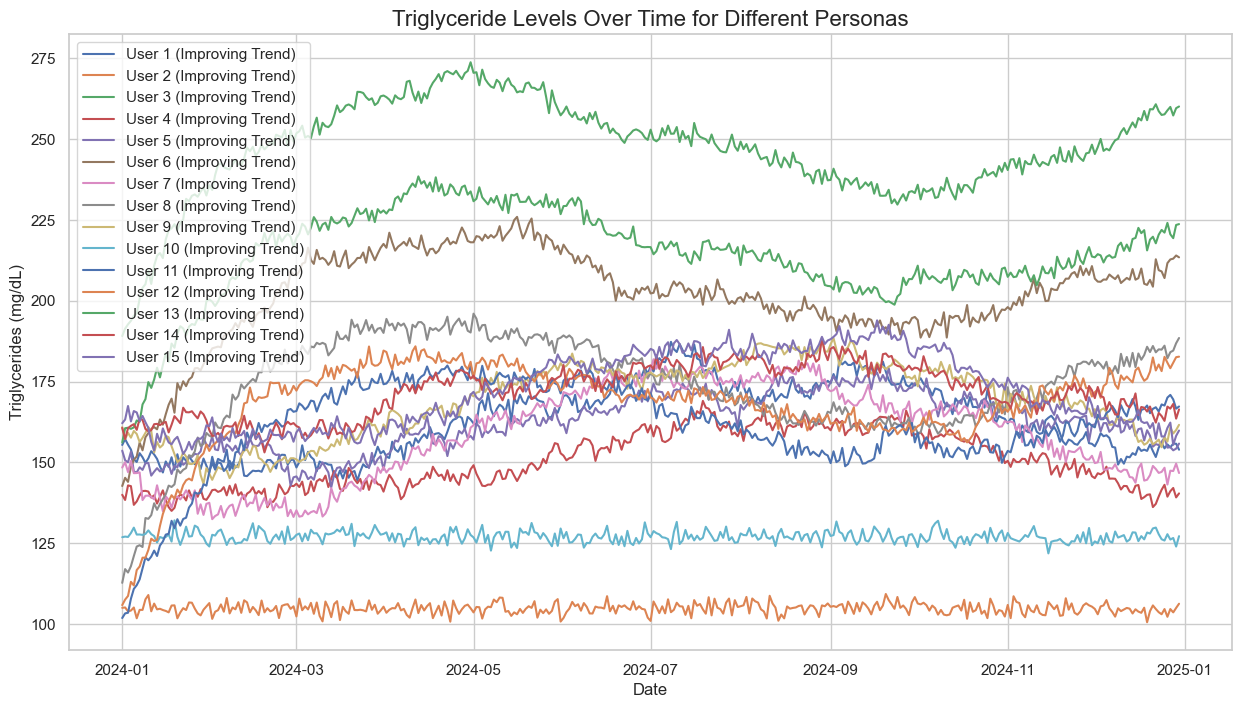

In [7]:
plt.figure(figsize=(15, 8))

# Find one user for each trend type
for i in range(1,16):
# Plot data for each user
    sns.lineplot(data=df[df['user_id'] == i], x='date', y='triglycerides', label=f'User {i} (Improving Trend)')

plt.title('Triglyceride Levels Over Time for Different Personas', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Triglycerides (mg/dL)')
plt.legend()
plt.show()

## 3. Correlation Analysis: Connecting Lifestyle to Health

Now, let's create a correlation heatmap. This will quickly show us which lifestyle factors have the strongest linear relationship with our target variables (`triglycerides` and `ggt`). We expect to see a positive correlation with `energy_balance` and a negative correlation with `active_minutes` and `sleep_quality_score`.

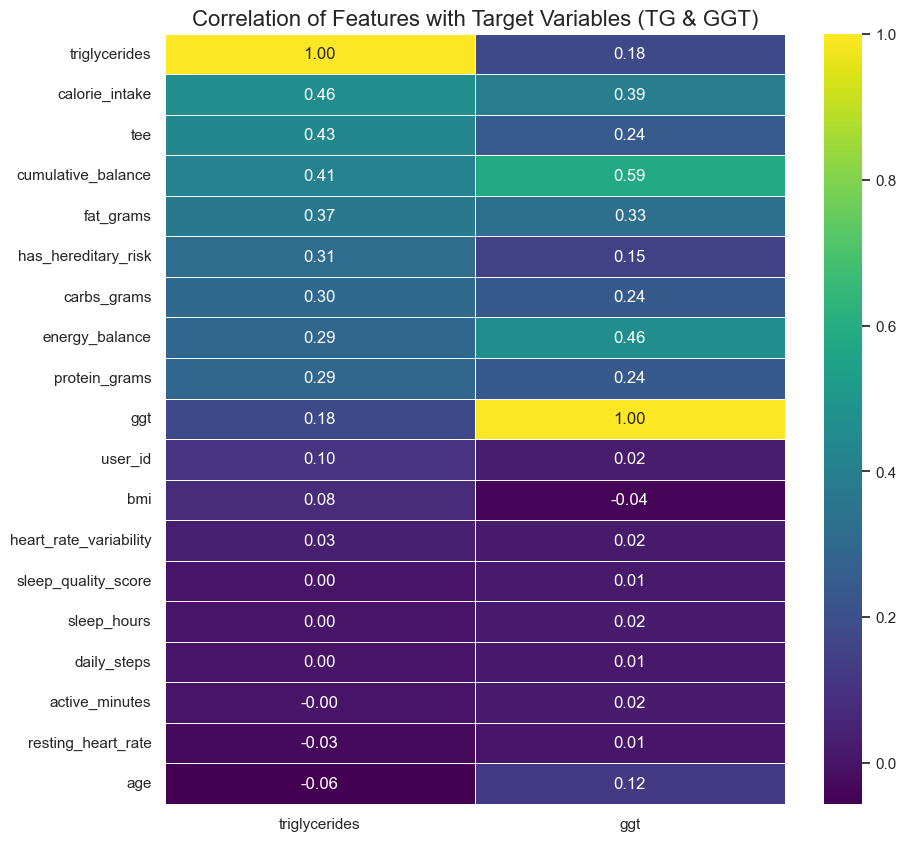

In [5]:
# Select only the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Focus on the correlations with our target variables
target_corr = corr_matrix[['triglycerides', 'ggt']].sort_values(by='triglycerides', ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(target_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation of Features with Target Variables (TG & GGT)', fontsize=16)
plt.show()

## 4. Distribution of Key Features

Finally, let's look at the distributions of a few key input and output features to ensure they are realistic and not skewed in an unexpected way.

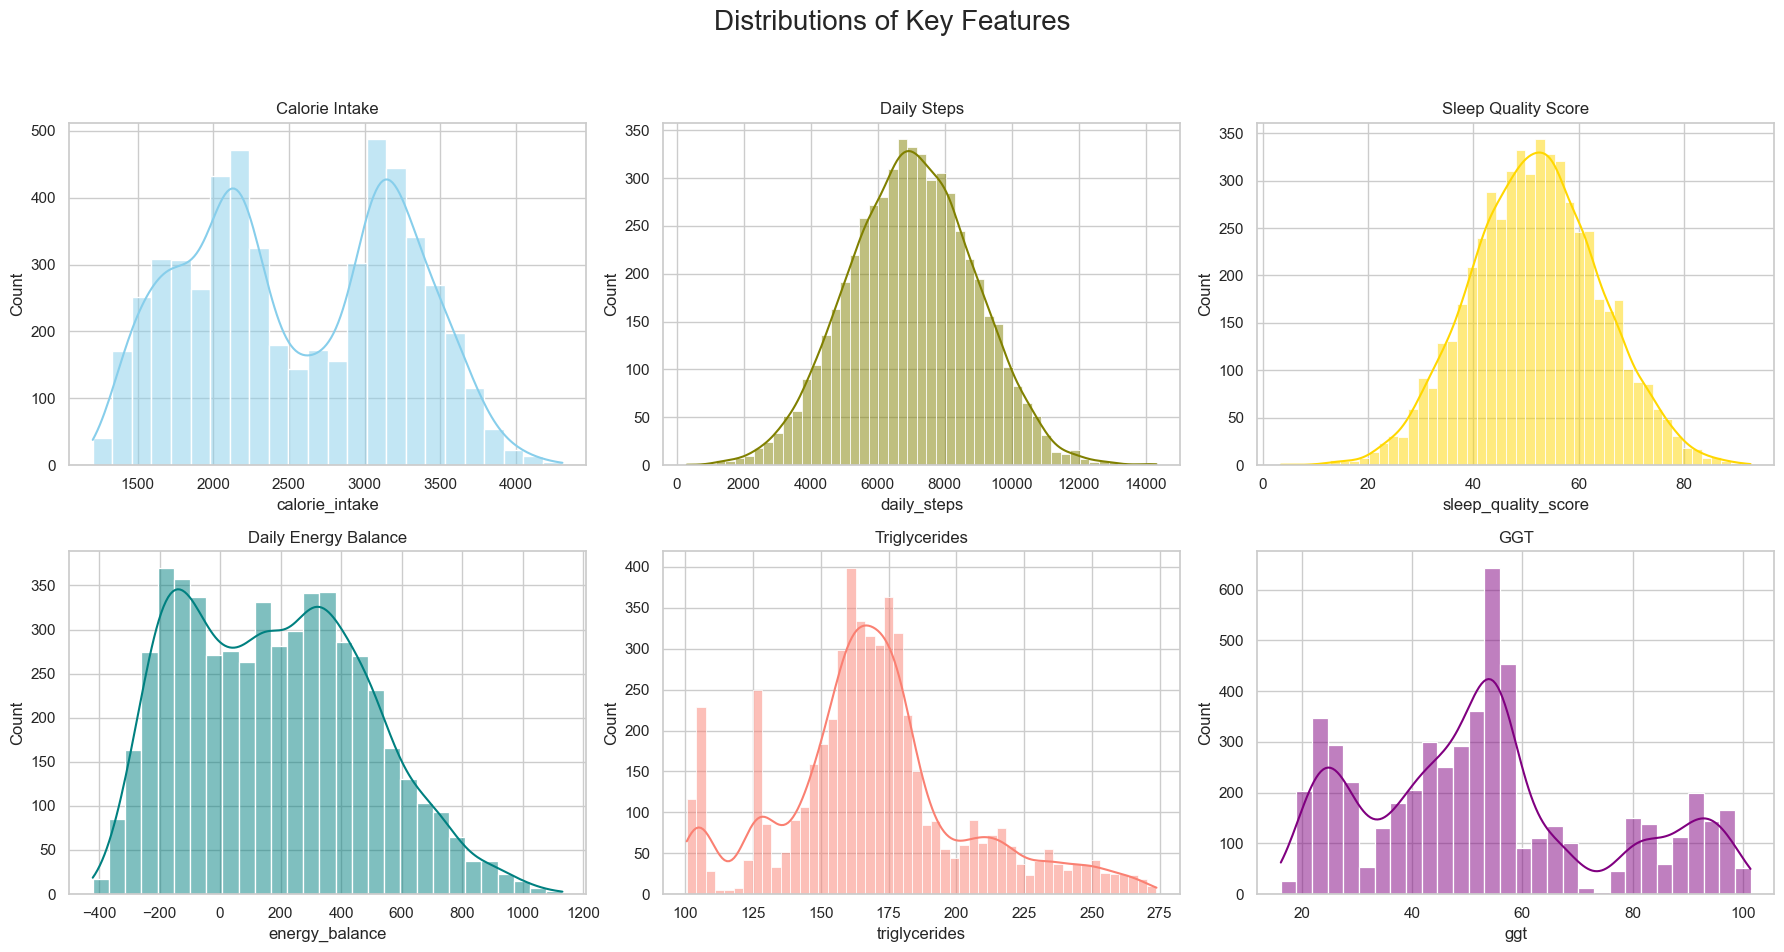

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distributions of Key Features', fontsize=20)

sns.histplot(df['calorie_intake'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Calorie Intake')
sns.histplot(df['daily_steps'], kde=True, ax=axes[0, 1], color='olive').set_title('Daily Steps')
sns.histplot(df['sleep_quality_score'], kde=True, ax=axes[0, 2], color='gold').set_title('Sleep Quality Score')
sns.histplot(df['energy_balance'], kde=True, ax=axes[1, 0], color='teal').set_title('Daily Energy Balance')
sns.histplot(df['triglycerides'], kde=True, ax=axes[1, 1], color='salmon').set_title('Triglycerides')
sns.histplot(df['ggt'], kde=True, ax=axes[1, 2], color='purple').set_title('GGT')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()